Conjugate Gaussians

In [8]:
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
import statistics

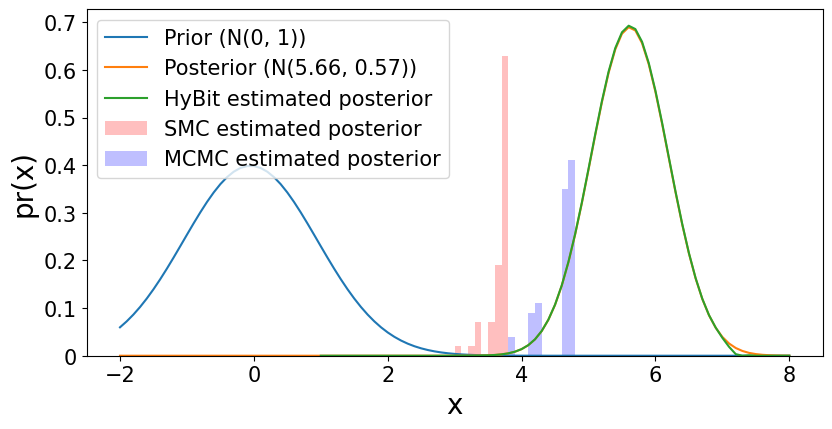

In [17]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [9.50, 4.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=15)
w = 0.1

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-2, 8.1, 0.1)

file1 = open("results1SMC.txt", "r")
lines1 = file1.readlines(100000)
# print(lines1[1:-1])
mcmc_samples = []
for i in lines1[1:-1]:
    curr = i.split(", ")
    for j in curr:
        mcmc_samples.append(float(j.strip(" ,\n")))
ax.hist(mcmc_samples, bins = np.arange(-2, 6 + w, w), alpha = 0.25, color="red")

file1 = open("results1MCMC.txt", "r")
lines1 = file1.readlines(100000)
# print(lines1[1:-1])
mcmc_samples = []
for i in lines1[1:-1]:
    curr = i.split(", ")
    for j in curr:
        mcmc_samples.append(float(j.strip(" ,\n")))
ax.hist(mcmc_samples, bins = np.arange(-2, 6 + w, w), alpha = 0.25, color="blue")
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

def normal_pr(x):
    return (statistics.NormalDist(mu=0.0, sigma=1.0).cdf(x + 0.1) - statistics.NormalDist(mu=0.0, sigma=1.0).cdf(x))*1000
def normal_pos(x):
    return (statistics.NormalDist(mu=17.0/3, sigma=1.0/math.sqrt(3)).cdf(x + 0.1) - statistics.NormalDist(mu=17.0/3, sigma=1.0/math.sqrt(3)).cdf(x))*1000
  
ax.plot(x_axis, [normal_pr(x) for x in x_axis])
ax.plot(x_axis, [normal_pos(x) for x in x_axis])

file = open("conjugate_gaussians_16_2048.txt", "r")
hybit_data = file.readlines()
hybit_data = [float(i)*1000 for i in hybit_data]
ax.plot([i/10 for i in range(10, 81, 1)], hybit_data)



ax.legend(["Prior (N(0, 1))", "Posterior (N(5.66, 0.57))", "HyBit estimated posterior", "SMC estimated posterior", "MCMC estimated posterior"])

ax.set_xlabel("x")
ax.set_ylabel("pr(x)")

scale_y = 100
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

fig.savefig("results/conjugate_gaussians.pdf")